In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
df_hr=pd.read_csv('train.csv')
df_hr.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
df_hr=df_hr.set_index('employee_id')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
# df_hr['is_promoted']=df_hr['is_promoted'].astype('object')

In [6]:
df_hr.shape

(54808, 12)

In [7]:
df_hr.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [8]:
df_hr.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
# df_hr['previous_year_rating']=df_hr['previous_year_rating'].astype('object') 

In [10]:
df_hr.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [11]:
df_hr.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
df_hr['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [13]:
df_hr['region'].nunique()

34

In [15]:
df_hr['region']=df_hr.groupby('region')['is_promoted'].transform('mean')

In [16]:
# tab=df_hr['department'].value_counts(normalize=True)
# df_hr['department']=df_hr['department'].map(tab)

In [17]:
df_hr['department']=df_hr.groupby('department')['is_promoted'].transform('mean')

In [18]:
df_hr['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [19]:
df_hr1=pd.get_dummies(df_hr,columns=['gender','recruitment_channel'],drop_first=True)

In [20]:
df_hr1.head(5)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,Master's & above,1,35,5.0,8,0,49,0,0,0,1
65141,0.090148,0.114188,Bachelor's,1,30,5.0,4,0,60,0,1,0,0
7513,0.072031,0.060641,Bachelor's,1,34,3.0,7,0,50,0,1,0,1
2542,0.072031,0.116596,Bachelor's,2,39,1.0,10,0,50,0,1,0,0
48945,0.107593,0.063274,Bachelor's,1,45,3.0,2,0,73,0,1,0,0


In [21]:
df_hr1.isnull().sum()

department                         0
region                             0
education                       2409
no_of_trainings                    0
age                                0
previous_year_rating            4124
length_of_service                  0
awards_won                         0
avg_training_score                 0
is_promoted                        0
gender_m                           0
recruitment_channel_referred       0
recruitment_channel_sourcing       0
dtype: int64

In [22]:
df_hr1['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [23]:
df_hr1['education'].replace({"Below Secondary":0,"Bachelor's":1,"Master's & above":2},inplace=True)

In [24]:
df_hr['previous_year_rating']=df_hr['previous_year_rating'].fillna(df_hr['previous_year_rating'].median())

In [25]:
df_hr1.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,2.0,1,35,5.0,8,0,49,0,0,0,1
65141,0.090148,0.114188,1.0,1,30,5.0,4,0,60,0,1,0,0
7513,0.072031,0.060641,1.0,1,34,3.0,7,0,50,0,1,0,1
2542,0.072031,0.116596,1.0,2,39,1.0,10,0,50,0,1,0,0
48945,0.107593,0.063274,1.0,1,45,3.0,2,0,73,0,1,0,0


In [26]:
df_hr1['department'].value_counts()

0.072031    16840
0.090148    11348
0.107593     7138
0.096386     7138
0.095665     5352
0.081230     2536
0.056245     2418
0.051011     1039
0.069069      999
Name: department, dtype: int64

In [27]:
from sklearn.impute import KNNImputer
impu=KNNImputer()
df=impu.fit_transform(df_hr1)

df_hr2=pd.DataFrame(df,columns=df_hr1.columns,index=df_hr1.index)

In [28]:
df_hr2.isnull().sum()

department                      0
region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
is_promoted                     0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

In [29]:
df_hr2.head(2)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,
65438,0.072031,0.106546,2.0,1.0,35.0,5.0,8.0,0.0,49.0,0.0,0.0,0.0,1.0
65141,0.090148,0.114188,1.0,1.0,30.0,5.0,4.0,0.0,60.0,0.0,1.0,0.0,0.0


In [30]:
df_hr['is_promoted'].value_counts()/len(df_hr2['is_promoted'])*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

In [31]:
df_out=df_hr2[['is_promoted']]

In [32]:
dfw=df_hr2.drop('is_promoted',1)

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_sca=ss.fit_transform(dfw)
df_num_sca = pd.DataFrame(num_sca, columns = dfw.columns,index=dfw.index)

In [34]:
df_num_sca.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,
65438,-0.895520,0.822025,1.564112,-0.415276,0.025598,1.369359,0.500460,-0.154018,-1.075931,-1.536223,-0.145876,1.166353
65141,0.339283,1.115924,-0.558277,-0.415276,-0.627135,1.369359,-0.437395,-0.154018,-0.253282,0.650947,-0.145876,-0.857373
7513,-0.895520,-0.943310,-0.558277,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-1.001145,0.650947,-0.145876,1.166353
2542,-0.895520,1.208520,-0.558277,1.226063,0.547785,-1.901429,0.969387,-0.154018,-1.001145,0.650947,-0.145876,-0.857373
48945,1.528282,-0.842031,-0.558277,-0.415276,1.331064,-0.266035,-0.906322,-0.154018,0.718939,0.650947,-0.145876,-0.857373


In [35]:
# df_in=df_num_sca.drop('is_promoted',axis=1)

In [36]:
df_out.head()

,is_promoted
employee_id,
65438,0.0
65141,0.0
7513,0.0
2542,0.0
48945,0.0


In [37]:
df_hr2['is_promoted'].isnull().sum()

0

In [38]:
from sklearn.cluster import KMeans

584166.2683449342
530898.1946990245
479392.9005596016
449942.76548548206
402264.56941577146
377554.731495839
353357.82313475444


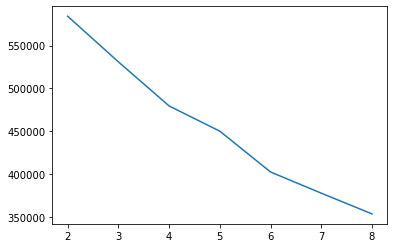

In [39]:
wcsse=[]
cl=[2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i,random_state=0)
    mod.fit(df_num_sca)
    print(mod.inertia_)
    wcsse.append(mod.inertia_)

plt.plot(cl,wcsse)

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
cl=[2,3,4,5,6,7,8]
for k in cl:
    clust_mod=KMeans(n_clusters=k,max_iter=1000,random_state=0)
    clust_mod.fit(df_num_sca)
    print(k,silhouette_score(df_num_sca,clust_mod.labels_))

2 0.12111197136329079
3 0.13417088883446857
4 0.13340116733008578
5 0.14037657747477536
6 0.14693774505130186
7 0.15323508054007898
8 0.159029320699846


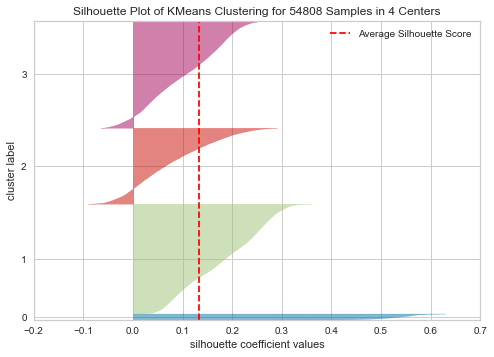

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer
clust_mod=KMeans(n_clusters=4,max_iter=1000,random_state=0)
viz=SilhouetteVisualizer(clust_mod,colors='yellowbrick')
viz.fit(df_num_sca)
viz.show()

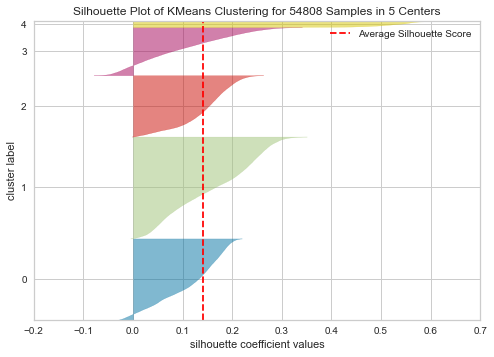

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
clust_mod=KMeans(n_clusters=5,max_iter=1000,random_state=0)
viz=SilhouetteVisualizer(clust_mod,colors='yellowbrick')
viz.fit(df_num_sca)
viz.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
clust_mod=KMeans(n_clusters=6,max_iter=1000,random_state=0)
viz=SilhouetteVisualizer(clust_mod,colors='yellowbrick')
viz.fit(df_num_sca)
viz.show()

In [44]:
#the optimum k value for elbow curve is 4,5,6
#for silhouette score k = 5 is doing good when compared with other k values are k=5
#is less overlapping towards negative side than other values.

In [97]:
clust_mod=KMeans(n_clusters=5)
clust_mod.fit(df_num_sca)
label = clust_mod.labels_

In [98]:
label

array([1, 2, 3, ..., 2, 3, 3])

In [99]:
df_num_sca['labels']=label

In [100]:
df_num_sca['labels'].value_counts()

2    19689
3    19254
1    13483
4     1240
0     1142
Name: labels, dtype: int64

In [101]:
df_num_sca['labels'].isnull().sum()

0

In [102]:
df_num_sca

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
65438,-0.895520,0.822025,1.564112,-0.415276,0.025598,1.369359,0.500460,-0.154018,-1.075931,-1.536223,-0.145876,1.166353,1
65141,0.339283,1.115924,-0.558277,-0.415276,-0.627135,1.369359,-0.437395,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,2
7513,-0.895520,-0.943310,-0.558277,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-1.001145,0.650947,-0.145876,1.166353,3
2542,-0.895520,1.208520,-0.558277,1.226063,0.547785,-1.901429,0.969387,-0.154018,-1.001145,0.650947,-0.145876,-0.857373,3
48945,1.528282,-0.842031,-0.558277,-0.415276,1.331064,-0.266035,-0.906322,-0.154018,0.718939,0.650947,-0.145876,-0.857373,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1.528282,-0.392266,-0.558277,-0.415276,1.722704,-0.266035,2.610632,-0.154018,1.092871,0.650947,-0.145876,1.166353,1
74592,0.339283,-0.238692,1.564112,-0.415276,0.286691,-1.083732,0.031532,-0.154018,-0.552428,-1.536223,-0.145876,-0.857373,1
13918,0.715311,0.381177,-0.558277,-0.415276,-1.018775,1.369359,-0.671858,-0.154018,1.167657,0.650947,-0.145876,-0.857373,2


In [103]:
clus0=df_num_sca[df_num_sca['labels']==0]
clus0

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
53092,1.528282,-0.193961,-0.558277,-0.415276,1.592157,-0.266035,0.265996,-0.154018,1.167657,0.650947,6.855144,-0.857373,0
17894,-0.895520,-0.193961,-0.558277,-0.415276,-0.104948,1.369359,-0.202931,-0.154018,-1.075931,0.650947,6.855144,-0.857373,0
63237,1.528282,1.115924,-0.558277,-0.415276,-1.149321,0.551662,-0.906322,-0.154018,1.392016,0.650947,6.855144,-0.857373,0
30682,1.528282,-0.193961,-0.558277,1.226063,-0.757681,0.551662,0.031532,-0.154018,0.868512,0.650947,6.855144,-0.857373,0
26563,0.764409,-0.193961,-0.558277,-0.415276,-0.235495,-0.266035,-0.671858,-0.154018,0.270221,-1.536223,6.855144,-0.857373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67583,-1.971443,-0.193961,-0.558277,-0.415276,-1.149321,1.369359,-0.906322,-0.154018,-1.001145,0.650947,6.855144,-0.857373,0
76704,1.528282,-0.193961,-0.558277,-0.415276,1.853251,-0.266035,1.672777,-0.154018,1.242443,-1.536223,6.855144,-0.857373,0
44591,0.339283,1.115924,-0.558277,-0.415276,-0.496588,1.369359,-0.906322,-0.154018,-0.328069,0.650947,6.855144,-0.857373,0


In [104]:
clus1=df_num_sca[df_num_sca['labels']==1]
clus1

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
65438,-0.895520,0.822025,1.564112,-0.415276,0.025598,1.369359,0.500460,-0.154018,-1.075931,-1.536223,-0.145876,1.166353,1
16290,0.339283,-2.221736,1.564112,-0.415276,-0.235495,-0.266035,0.031532,-0.154018,-0.028924,0.650947,-0.145876,1.166353,1
60051,-0.895520,2.279733,-0.558277,-0.415276,1.853251,1.369359,-0.202931,-0.154018,-1.075931,0.650947,-0.145876,1.166353,1
38401,1.528282,-1.611728,1.564112,1.226063,0.547785,-0.266035,2.376168,-0.154018,1.242443,0.650947,-0.145876,-0.857373,1
77040,-1.097387,-0.193961,1.564112,-0.415276,0.286691,-0.266035,0.265996,-0.154018,1.541588,0.650947,-0.145876,1.166353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,0.764409,-0.234977,1.564112,-0.415276,0.025598,-0.266035,0.265996,-0.154018,0.494580,0.650947,-0.145876,-0.857373,1
12592,-0.895520,1.561065,1.564112,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,1
40257,-0.895520,-0.193961,1.564112,1.226063,0.678331,1.369359,-0.437395,-0.154018,-0.926359,-1.536223,-0.145876,-0.857373,1


In [105]:
clus2=df_num_sca[df_num_sca['labels']==2]
clus2

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
65141,0.339283,1.115924,-0.558277,-0.415276,-0.627135,1.369359,-0.437395,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,2
48945,1.528282,-0.842031,-0.558277,-0.415276,1.331064,-0.266035,-0.906322,-0.154018,0.718939,0.650947,-0.145876,-0.857373,2
58896,0.715311,-0.193961,-0.558277,1.226063,-0.496588,-0.266035,0.265996,-0.154018,1.616374,0.650947,-0.145876,1.166353,2
20379,0.339283,-1.058436,-0.558277,-0.415276,-0.496588,-0.266035,-0.202931,-0.154018,-0.328069,-1.536223,-0.145876,-0.857373,2
73202,0.715311,-1.058436,-0.558277,-0.415276,-0.888228,0.551662,-0.202931,-0.154018,1.466802,0.650947,-0.145876,-0.857373,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77455,1.528282,-0.238692,-0.558277,4.508742,-1.149321,-0.266035,-0.671858,-0.154018,1.541588,0.650947,-0.145876,1.166353,2
27274,1.528282,-1.111248,-0.558277,-0.415276,-0.366042,-1.901429,-0.671858,-0.154018,1.392016,0.650947,-0.145876,1.166353,2
28400,1.528282,-0.193961,-0.558277,-0.415276,-0.235495,-1.901429,0.734923,-0.154018,1.167657,0.650947,-0.145876,-0.857373,2


In [106]:
clus3=df_num_sca[df_num_sca['labels']==3]
clus3

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
7513,-0.895520,-0.943310,-0.558277,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-1.001145,0.650947,-0.145876,1.166353,3
2542,-0.895520,1.208520,-0.558277,1.226063,0.547785,-1.901429,0.969387,-0.154018,-1.001145,0.650947,-0.145876,-0.857373,3
28911,-0.895520,0.381177,1.564112,-0.415276,-0.366042,1.369359,-0.202931,-0.154018,-0.702000,0.650947,-0.145876,1.166353,3
49017,-0.895520,0.822025,-0.558277,-0.415276,0.025598,1.369359,-0.671858,-0.154018,-1.001145,-1.536223,-0.145876,1.166353,3
43931,0.339283,0.822025,-0.558277,-0.415276,0.286691,-1.901429,0.969387,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35000,0.339283,-0.597824,-0.558277,-0.415276,0.286691,0.551662,0.265996,-0.154018,-0.702000,0.650947,-0.145876,-0.857373,3
39227,-1.971443,-1.111248,-0.558277,1.226063,-0.104948,1.369359,-0.671858,-0.154018,-0.851573,0.650947,-0.145876,-0.857373,3
6915,-0.895520,-0.392266,-0.558277,1.226063,-0.496588,-1.901429,-0.906322,-0.154018,-1.075931,0.650947,-0.145876,-0.857373,3


In [107]:
clus4=df_num_sca[df_num_sca['labels']==4]
clus4

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels
employee_id,,,,,,,,,,,,,
77981,-0.268521,1.115924,-0.558277,-0.415276,-1.018775,-0.593114,-1.140785,6.492758,-0.402855,0.650947,-0.145876,-0.857373,4
38052,0.764409,-2.221736,1.564112,-0.415276,0.286691,1.369359,-0.671858,6.492758,2.139878,0.650947,-0.145876,1.166353,4
51164,1.528282,-0.392266,-0.558277,-0.415276,-0.496588,0.551662,-0.437395,6.492758,1.092871,-1.536223,-0.145876,-0.857373,4
7606,1.528282,-1.611728,-0.558277,1.226063,-0.627135,-0.266035,0.265996,6.492758,0.943298,-1.536223,-0.145876,-0.857373,4
53630,-0.895520,1.208520,1.564112,-0.415276,-0.104948,0.551662,-0.202931,6.492758,2.289451,-1.536223,-0.145876,1.166353,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,-0.895520,-0.238692,-0.558277,-0.415276,0.939424,-1.083732,-0.437395,6.492758,-1.225504,0.650947,-0.145876,-0.857373,4
4952,0.339283,1.218056,-0.558277,-0.415276,-0.888228,-0.266035,-0.906322,6.492758,-0.103710,0.650947,-0.145876,-0.857373,4
34501,0.339283,-0.238692,1.564112,-0.415276,0.286691,1.369359,-0.906322,6.492758,-0.477641,0.650947,-0.145876,-0.857373,4


In [108]:
clusc0=pd.merge(clus0,df_out,on='employee_id',how='inner')

In [109]:
clusc0

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels,is_promoted
employee_id,,,,,,,,,,,,,,
53092,1.528282,-0.193961,-0.558277,-0.415276,1.592157,-0.266035,0.265996,-0.154018,1.167657,0.650947,6.855144,-0.857373,0,0.0
17894,-0.895520,-0.193961,-0.558277,-0.415276,-0.104948,1.369359,-0.202931,-0.154018,-1.075931,0.650947,6.855144,-0.857373,0,0.0
63237,1.528282,1.115924,-0.558277,-0.415276,-1.149321,0.551662,-0.906322,-0.154018,1.392016,0.650947,6.855144,-0.857373,0,0.0
30682,1.528282,-0.193961,-0.558277,1.226063,-0.757681,0.551662,0.031532,-0.154018,0.868512,0.650947,6.855144,-0.857373,0,0.0
26563,0.764409,-0.193961,-0.558277,-0.415276,-0.235495,-0.266035,-0.671858,-0.154018,0.270221,-1.536223,6.855144,-0.857373,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67583,-1.971443,-0.193961,-0.558277,-0.415276,-1.149321,1.369359,-0.906322,-0.154018,-1.001145,0.650947,6.855144,-0.857373,0,0.0
76704,1.528282,-0.193961,-0.558277,-0.415276,1.853251,-0.266035,1.672777,-0.154018,1.242443,-1.536223,6.855144,-0.857373,0,0.0
44591,0.339283,1.115924,-0.558277,-0.415276,-0.496588,1.369359,-0.906322,-0.154018,-0.328069,0.650947,6.855144,-0.857373,0,0.0


In [110]:
clusc0['is_promoted'].value_counts()/len(clusc0['is_promoted'])*100

0.0    87.915937
1.0    12.084063
Name: is_promoted, dtype: float64

In [111]:
#There are only 12% of employees who got promoted in cluster 0

In [112]:
clusc1=pd.merge(clus1,df_out,on='employee_id',how='inner')

In [113]:
clusc1

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels,is_promoted
employee_id,,,,,,,,,,,,,,
65438,-0.895520,0.822025,1.564112,-0.415276,0.025598,1.369359,0.500460,-0.154018,-1.075931,-1.536223,-0.145876,1.166353,1,0.0
16290,0.339283,-2.221736,1.564112,-0.415276,-0.235495,-0.266035,0.031532,-0.154018,-0.028924,0.650947,-0.145876,1.166353,1,0.0
60051,-0.895520,2.279733,-0.558277,-0.415276,1.853251,1.369359,-0.202931,-0.154018,-1.075931,0.650947,-0.145876,1.166353,1,0.0
38401,1.528282,-1.611728,1.564112,1.226063,0.547785,-0.266035,2.376168,-0.154018,1.242443,0.650947,-0.145876,-0.857373,1,0.0
77040,-1.097387,-0.193961,1.564112,-0.415276,0.286691,-0.266035,0.265996,-0.154018,1.541588,0.650947,-0.145876,1.166353,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,0.764409,-0.234977,1.564112,-0.415276,0.025598,-0.266035,0.265996,-0.154018,0.494580,0.650947,-0.145876,-0.857373,1,0.0
12592,-0.895520,1.561065,1.564112,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,1,1.0
40257,-0.895520,-0.193961,1.564112,1.226063,0.678331,1.369359,-0.437395,-0.154018,-0.926359,-1.536223,-0.145876,-0.857373,1,0.0


In [114]:
clusc1['is_promoted'].value_counts()/len(clusc1['is_promoted'])*100

0.0    92.167915
1.0     7.832085
Name: is_promoted, dtype: float64

In [115]:
#There are over 7% of employees who got promoted in cluster 1

In [116]:
clusc2=pd.merge(clus2,df_out,on='employee_id',how='inner')

In [117]:
clusc2

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels,is_promoted
employee_id,,,,,,,,,,,,,,
65141,0.339283,1.115924,-0.558277,-0.415276,-0.627135,1.369359,-0.437395,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,2,0.0
48945,1.528282,-0.842031,-0.558277,-0.415276,1.331064,-0.266035,-0.906322,-0.154018,0.718939,0.650947,-0.145876,-0.857373,2,0.0
58896,0.715311,-0.193961,-0.558277,1.226063,-0.496588,-0.266035,0.265996,-0.154018,1.616374,0.650947,-0.145876,1.166353,2,0.0
20379,0.339283,-1.058436,-0.558277,-0.415276,-0.496588,-0.266035,-0.202931,-0.154018,-0.328069,-1.536223,-0.145876,-0.857373,2,0.0
73202,0.715311,-1.058436,-0.558277,-0.415276,-0.888228,0.551662,-0.202931,-0.154018,1.466802,0.650947,-0.145876,-0.857373,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77455,1.528282,-0.238692,-0.558277,4.508742,-1.149321,-0.266035,-0.671858,-0.154018,1.541588,0.650947,-0.145876,1.166353,2,0.0
27274,1.528282,-1.111248,-0.558277,-0.415276,-0.366042,-1.901429,-0.671858,-0.154018,1.392016,0.650947,-0.145876,1.166353,2,0.0
28400,1.528282,-0.193961,-0.558277,-0.415276,-0.235495,-1.901429,0.734923,-0.154018,1.167657,0.650947,-0.145876,-0.857373,2,0.0


In [118]:
clusc2['is_promoted'].value_counts()/len(clusc2['is_promoted'])*100

0.0    89.948702
1.0    10.051298
Name: is_promoted, dtype: float64

In [119]:
#There are over 10% of employees who got promoted in cluster 2

In [120]:
clusc3=pd.merge(clus3,df_out,on='employee_id',how='inner')
clusc3

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels,is_promoted
employee_id,,,,,,,,,,,,,,
7513,-0.895520,-0.943310,-0.558277,-0.415276,-0.104948,-0.266035,0.265996,-0.154018,-1.001145,0.650947,-0.145876,1.166353,3,0.0
2542,-0.895520,1.208520,-0.558277,1.226063,0.547785,-1.901429,0.969387,-0.154018,-1.001145,0.650947,-0.145876,-0.857373,3,0.0
28911,-0.895520,0.381177,1.564112,-0.415276,-0.366042,1.369359,-0.202931,-0.154018,-0.702000,0.650947,-0.145876,1.166353,3,0.0
49017,-0.895520,0.822025,-0.558277,-0.415276,0.025598,1.369359,-0.671858,-0.154018,-1.001145,-1.536223,-0.145876,1.166353,3,1.0
43931,0.339283,0.822025,-0.558277,-0.415276,0.286691,-1.901429,0.969387,-0.154018,-0.253282,0.650947,-0.145876,-0.857373,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35000,0.339283,-0.597824,-0.558277,-0.415276,0.286691,0.551662,0.265996,-0.154018,-0.702000,0.650947,-0.145876,-0.857373,3,0.0
39227,-1.971443,-1.111248,-0.558277,1.226063,-0.104948,1.369359,-0.671858,-0.154018,-0.851573,0.650947,-0.145876,-0.857373,3,0.0
6915,-0.895520,-0.392266,-0.558277,1.226063,-0.496588,-1.901429,-0.906322,-0.154018,-1.075931,0.650947,-0.145876,-0.857373,3,0.0


In [121]:
clusc3['is_promoted'].value_counts()/len(clusc3['is_promoted'])*100

0.0    95.071154
1.0     4.928846
Name: is_promoted, dtype: float64

In [122]:
#There are overall 4% of employees who got promoted in cluster 3

In [123]:
clusc4=pd.merge(clus4,df_out,on='employee_id',how='inner')
clusc4

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,labels,is_promoted
employee_id,,,,,,,,,,,,,,
77981,-0.268521,1.115924,-0.558277,-0.415276,-1.018775,-0.593114,-1.140785,6.492758,-0.402855,0.650947,-0.145876,-0.857373,4,1.0
38052,0.764409,-2.221736,1.564112,-0.415276,0.286691,1.369359,-0.671858,6.492758,2.139878,0.650947,-0.145876,1.166353,4,1.0
51164,1.528282,-0.392266,-0.558277,-0.415276,-0.496588,0.551662,-0.437395,6.492758,1.092871,-1.536223,-0.145876,-0.857373,4,0.0
7606,1.528282,-1.611728,-0.558277,1.226063,-0.627135,-0.266035,0.265996,6.492758,0.943298,-1.536223,-0.145876,-0.857373,4,0.0
53630,-0.895520,1.208520,1.564112,-0.415276,-0.104948,0.551662,-0.202931,6.492758,2.289451,-1.536223,-0.145876,1.166353,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,-0.895520,-0.238692,-0.558277,-0.415276,0.939424,-1.083732,-0.437395,6.492758,-1.225504,0.650947,-0.145876,-0.857373,4,0.0
4952,0.339283,1.218056,-0.558277,-0.415276,-0.888228,-0.266035,-0.906322,6.492758,-0.103710,0.650947,-0.145876,-0.857373,4,0.0
34501,0.339283,-0.238692,1.564112,-0.415276,0.286691,1.369359,-0.906322,6.492758,-0.477641,0.650947,-0.145876,-0.857373,4,0.0


In [124]:
clusc4['is_promoted'].value_counts()/len(clusc4['is_promoted'])*100

0.0    55.967742
1.0    44.032258
Name: is_promoted, dtype: float64

In [125]:
#There are 44% of employees who got promoted in cluster 4

In [126]:
#There are more number of employees promoted(i.e)44% in cluster 4 when compared with other clusters
#There are very less number of employees promoted (i.e) 4% in cluster 3 when compared with other clusters

In [128]:
df_hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [129]:
df_hr['cluster']=label

In [130]:
df_hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,cluster
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,1
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,2
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,3
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,3
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,2


In [131]:
df_hrc=df_hr[df_hr['cluster']==4]

In [132]:
df_hrc.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,cluster
employee_id,,,,,,,,,,,,,
77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,58,1,4
38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,1,92,1,4
51164,Technology,region_14,Bachelor's,f,other,1,31,4.0,4,1,78,0,4
7606,Technology,region_29,Bachelor's,f,other,2,30,3.0,7,1,76,0,4
53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,94,1,4


In [133]:
df_hrc['is_promoted'].value_counts()/len(df_hrc['is_promoted'])*100

0    55.967742
1    44.032258
Name: is_promoted, dtype: float64

In [134]:
df_hrc[df_hrc['is_promoted']==1]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,cluster
employee_id,,,,,,,,,,,,,
77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,58,1,4
38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,1,92,1,4
53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,94,1,4
62923,Operations,region_13,Master's & above,f,other,1,38,5.0,2,1,93,1,4
22865,Analytics,region_20,Master's & above,m,other,1,40,5.0,5,1,83,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69878,Analytics,region_26,Master's & above,m,sourcing,1,41,5.0,5,1,90,1,4
3752,HR,region_2,Master's & above,m,sourcing,1,60,5.0,8,1,50,1,4
37302,Operations,region_2,Bachelor's,m,other,1,37,5.0,7,1,79,1,4


In [135]:
df_hrc['department'].mode()[0]

'Sales & Marketing'

In [136]:
df_hrc['region'].mode()[0]

'region_2'

In [137]:
df_hrc['education'].mode()[0]

"Bachelor's"

In [138]:
df_hrc['gender'].mode()[0]        #gender does not influence promotion

'm'

In [139]:
df_hrc['recruitment_channel'].mode()[0]

'other'

In [140]:
df_hrc['no_of_trainings'].mode()[0]

1

In [141]:
df_hrc['previous_year_rating'].mode()[0]

3.0

In [142]:
df_hrc['awards_won'].mode()[0]

1

In [143]:
df_hrc['age'].mean()

34.439516129032256

In [144]:
df_hrc['length_of_service'].mean()

4.783870967741936

In [145]:
df_hrc['avg_training_score'].mean()

69.53467741935484